# Загрузка всего

Установка модулей

Импорт модулей и зависимостей

In [1]:
import pandas as pd

import os
import warnings
import numpy as np
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd
from blocksnet import AccessibilityProcessor
from iduedu import get_drive_graph,get_all_public_transport_graph,get_walk_graph,join_pt_walk_graph
from iduedu import get_boundary
from blocksnet.models import City
from blocksnet import ServiceType, Accessibility, Connectivity, LandUsePrediction, Provision, ProvisionMethod, Diversity, Centrality, PopulationCentrality, VacantArea, Spacematrix
from shapely.geometry import Point
warnings.filterwarnings("ignore")

Выбор папки загрузки

In [5]:
data_path = 'example_docs/hip_1'
blocks = gpd.read_file(os.path.join(data_path, 'blocks.geojson'))

In [ ]:
blocks.explore() # для визуальной проверки того, что кварталы нарезаны там, где надо

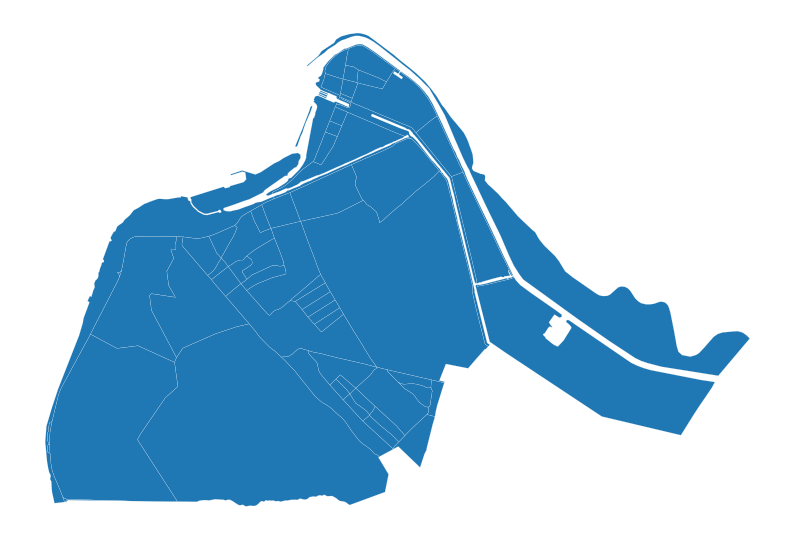

In [ ]:
blocks.plot(linewidth=0.1, figsize=(10,10)).set_axis_off() # тоже самое, но чтобы сохранить картинку без потери качества

# Подсчет

In [ ]:
bounds = get_boundary(osm_id=1430462) # передаем OSM id границ Шлиссельбурга

In [ ]:
G_drive = get_drive_graph(polygon=bounds, additional_edgedata=['highway', 'maxspeed', 'reg', 'ref','name'])

G_pt = get_all_public_transport_graph(osm_id=1430462,clip_by_bounds=True) #импорт интермодального графа
G_walk = get_walk_graph(osm_id=1430462)
G_int = join_pt_walk_graph(G_pt,G_walk,50)

Parsing pt routes:   0%|          | 0/4 [00:00<?, ?it/s]

Calculating the weights of the walk graph:   0%|          | 0/5296 [00:00<?, ?it/s]

In [ ]:
AccessibilityProcessor._fix_graph(G_drive)
AccessibilityProcessor._fix_graph(G_int)

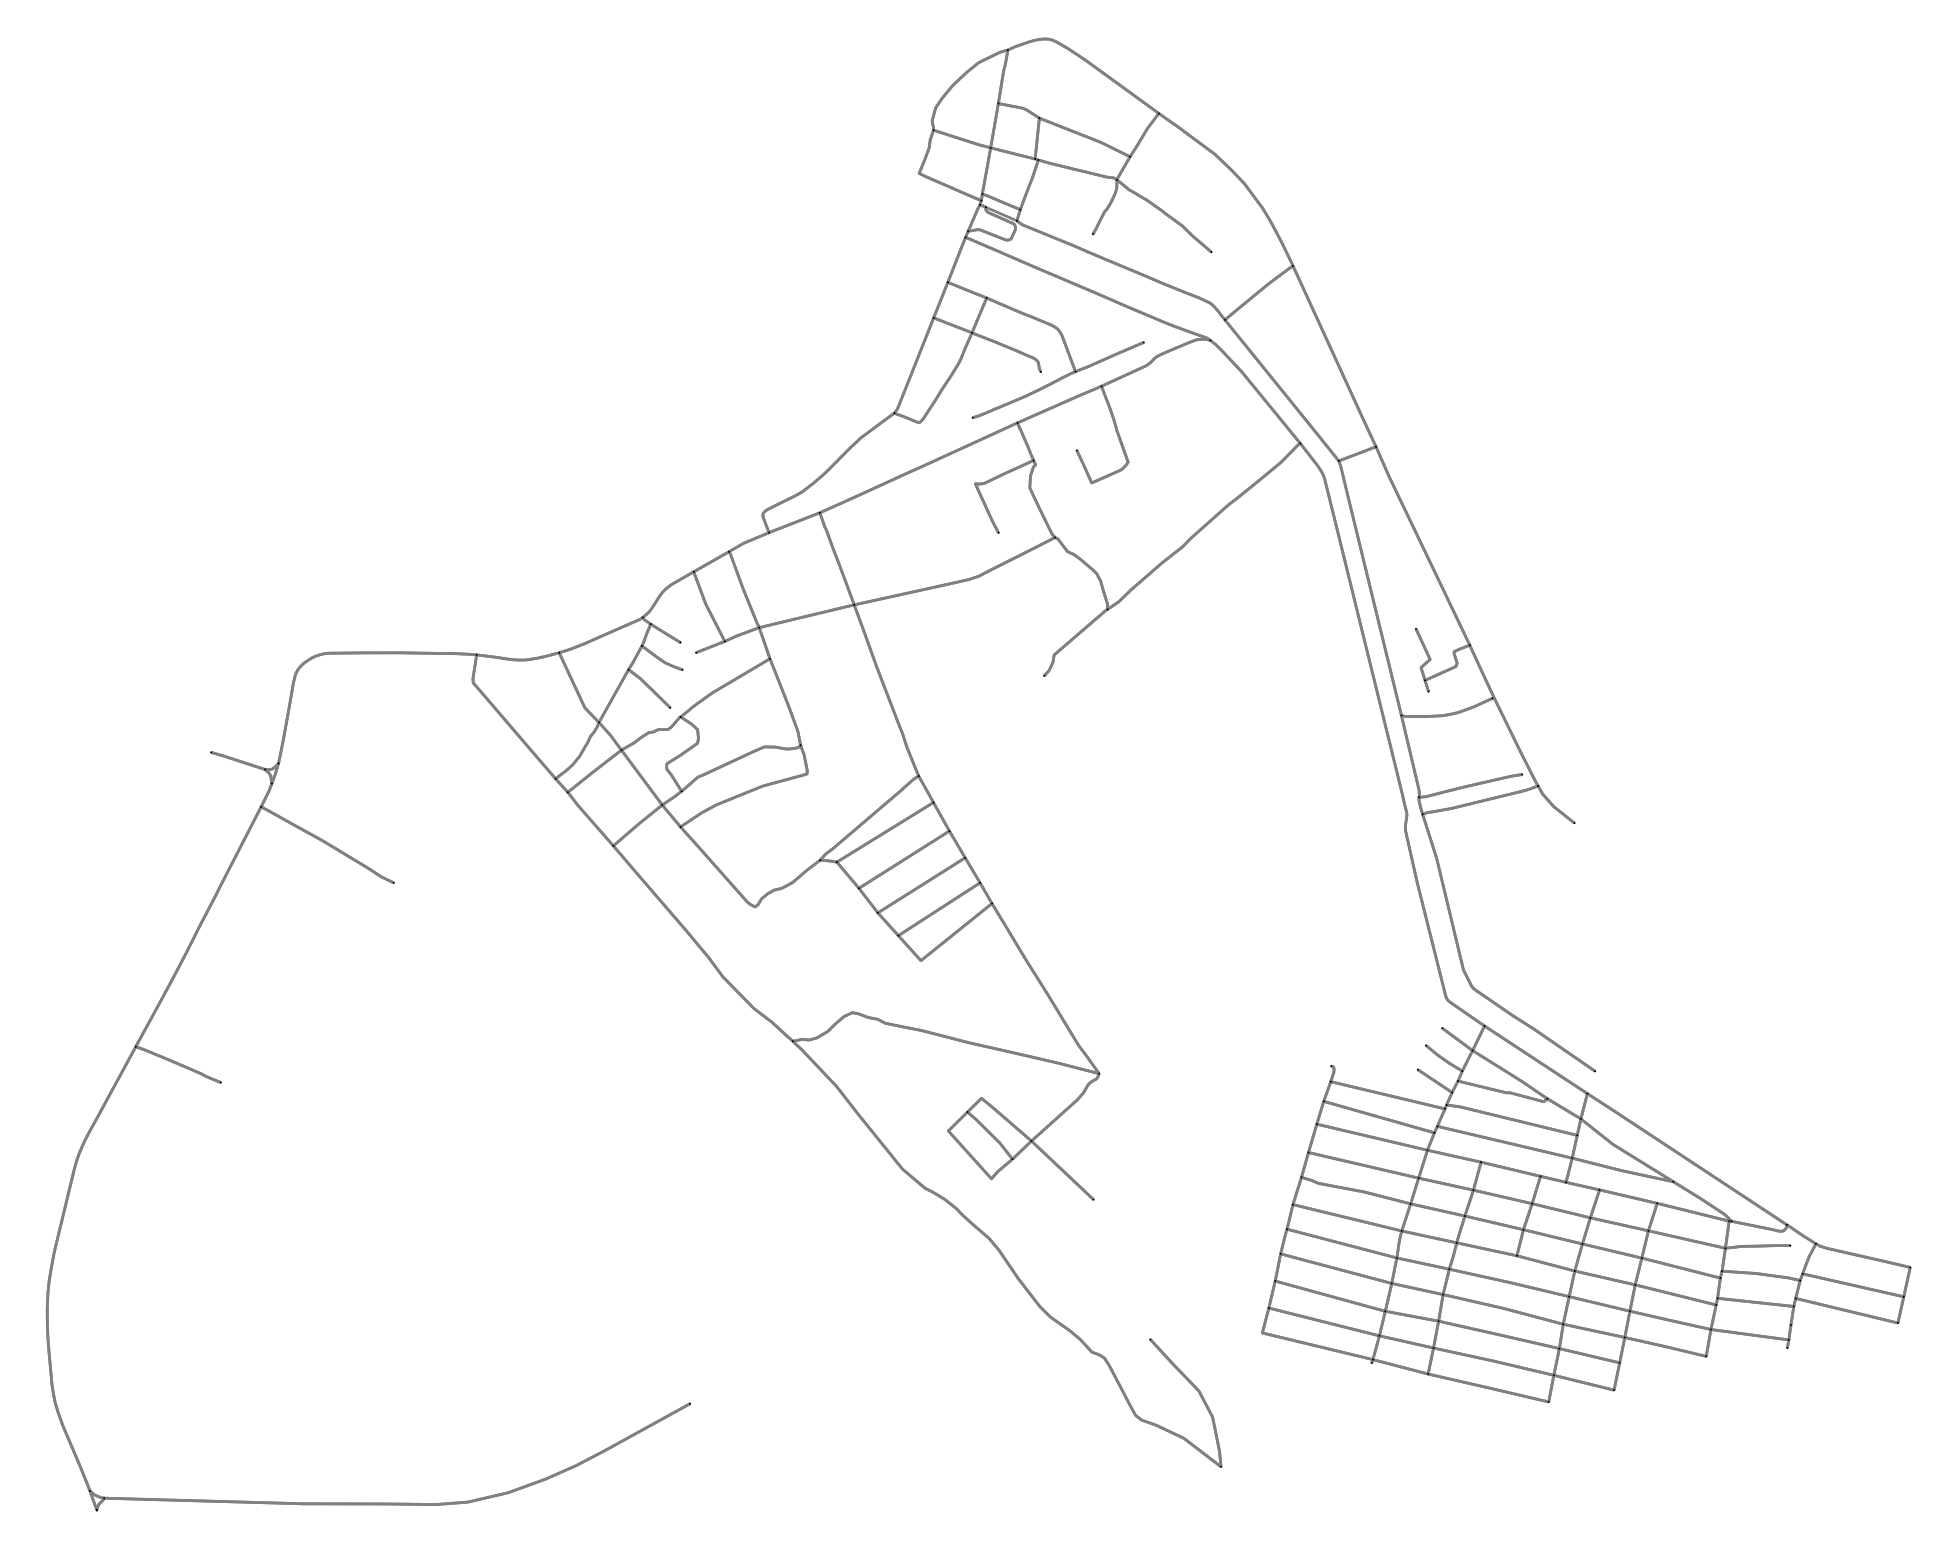

In [ ]:
fig, ax = ox.plot_graph(G_drive,
                    node_color='black', # цвет вершин
                    edge_color='grey', # цвет ребер
                    bgcolor='white', # цвет подложки
                    node_size=2, # размер верщин
                    edge_linewidth=2, # толщина ребер
                    figsize=(25,25)) # размер картинки

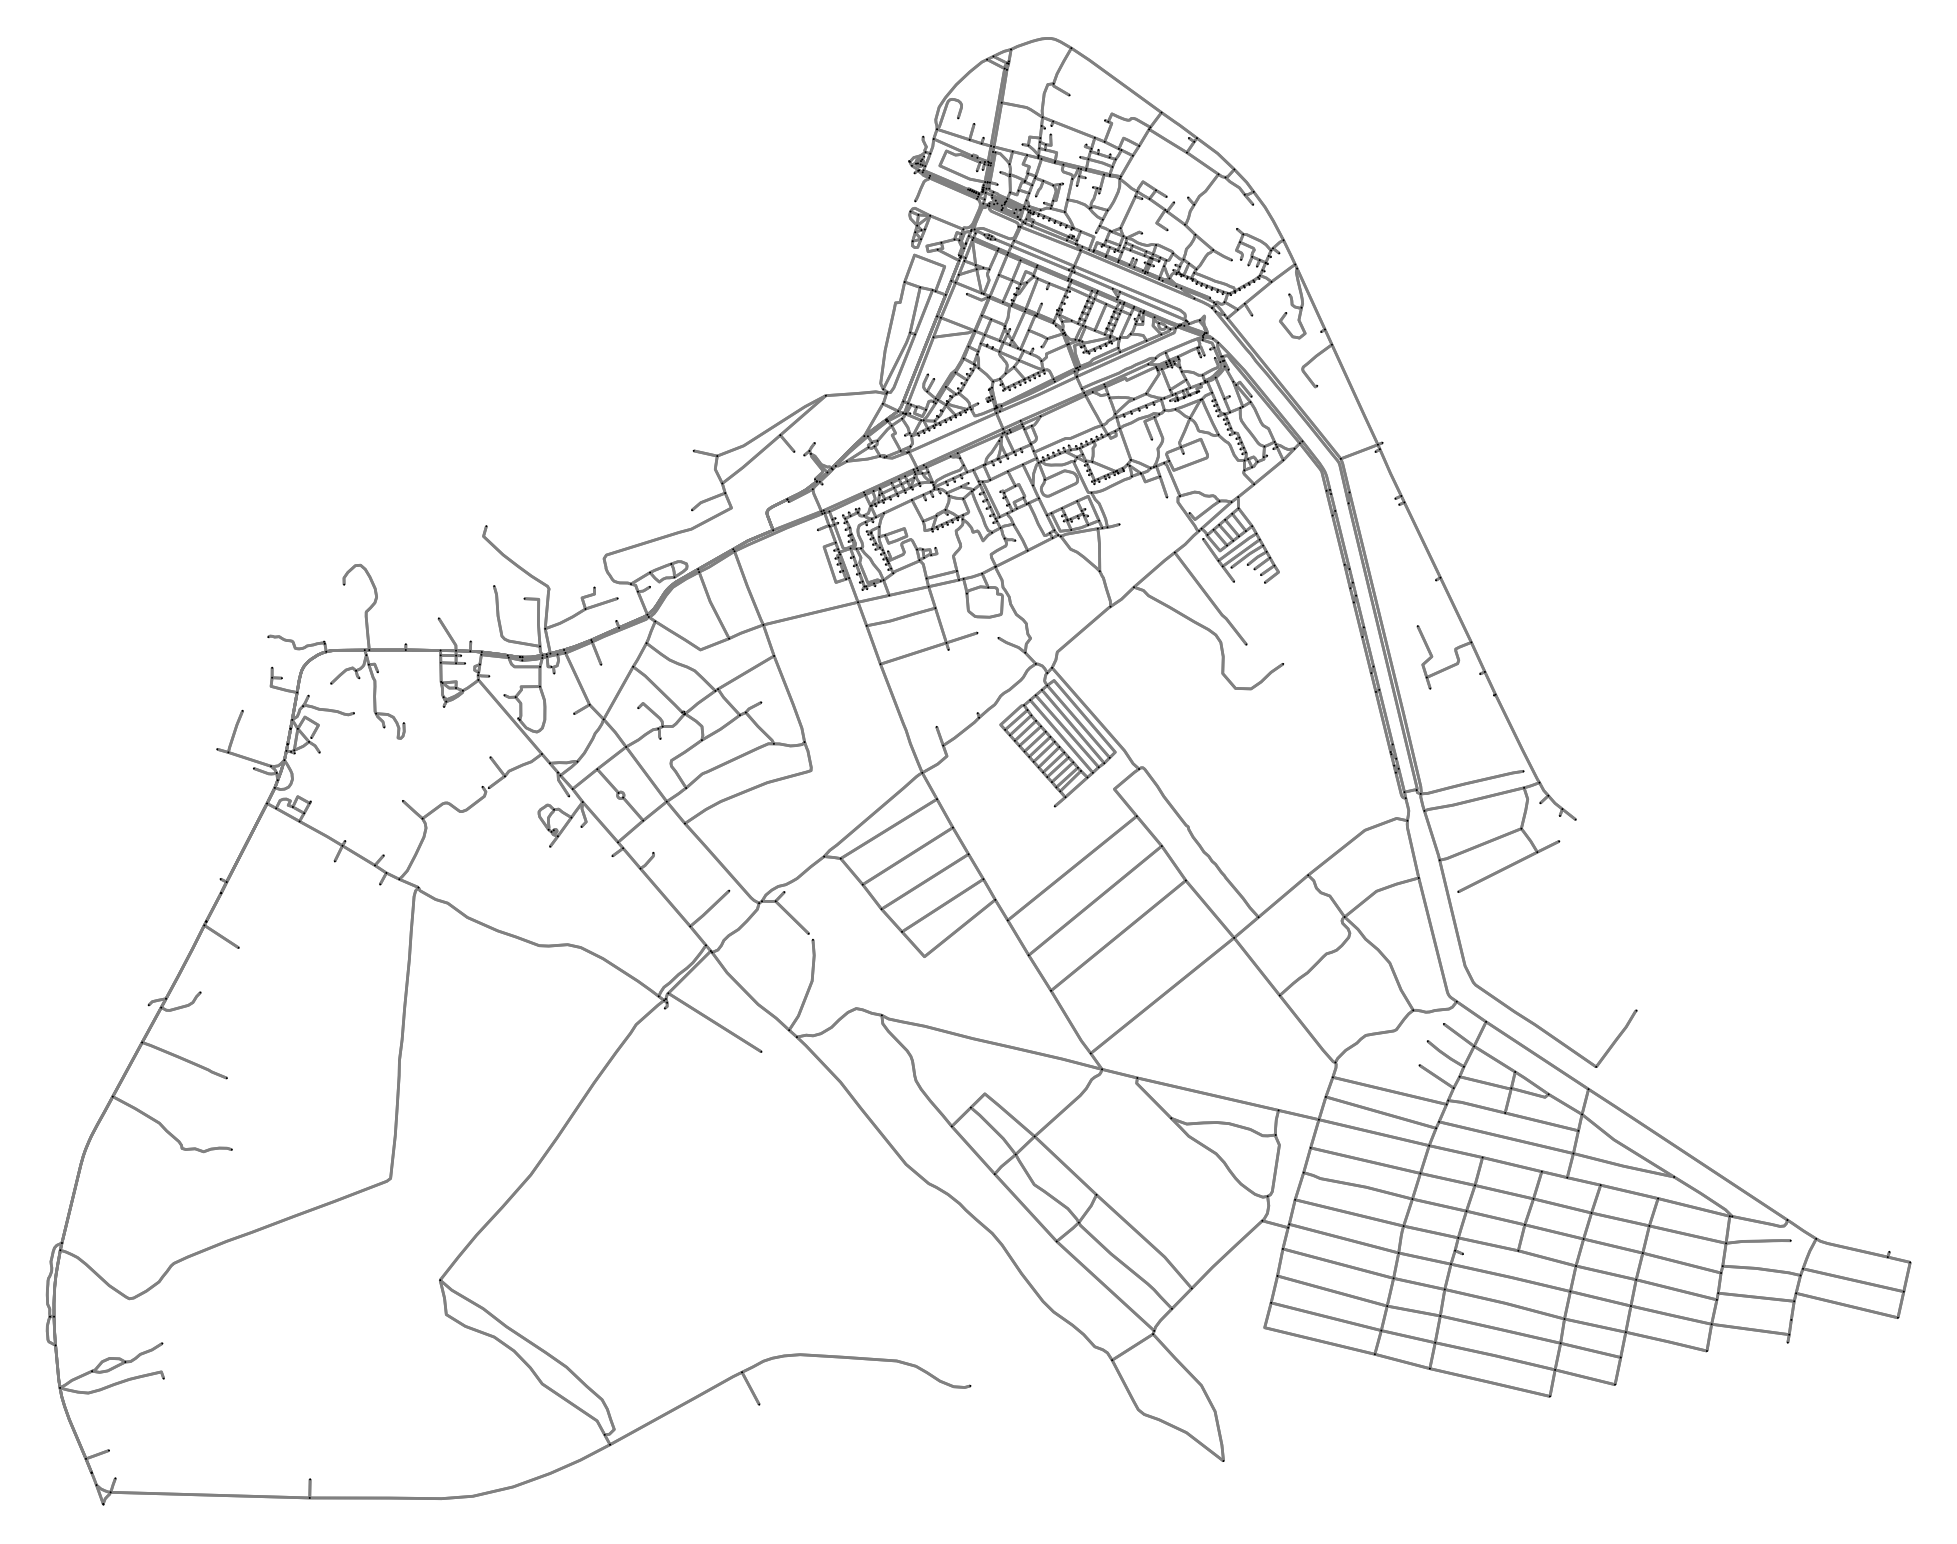

In [ ]:
fig, ax = ox.plot_graph(G_int,
                    node_color='black', # цвет вершин
                    edge_color='grey', # цвет ребер
                    bgcolor='white', # цвет подложки
                    node_size=2, # размер верщин
                    edge_linewidth=2, # толщина ребер
                    figsize=(25,25)) # размер картинки

In [ ]:
n,e = ox.graph_to_gdfs(G_drive)

In [ ]:
int_n,int_e = ox.graph_to_gdfs(G_int)

In [ ]:
ap = AccessibilityProcessor(blocks)

In [ ]:
acc_mx = ap.get_accessibility_matrix(G_int)
acc_mx.head() # вывод первых 5 строк полученной матрицы

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,0.00000,35.968750,40.906250,36.406250,58.06250,48.218750,43.312500,30.343750,42.343750,41.906250,...,35.875000,34.812500,33.687500,36.875000,40.937500,41.531250,60.09375,41.375000,42.31250,42.31250
1,38.18750,0.000000,19.250000,18.187500,34.34375,29.906250,19.609375,8.070312,18.640625,28.984375,...,22.921875,21.890625,20.750000,23.953125,27.390625,17.843750,36.37500,17.671875,18.62500,18.62500
2,40.90625,19.250000,0.000000,25.171875,41.34375,36.875000,26.593750,11.179688,25.609375,43.812500,...,34.031250,33.000000,31.859375,35.062500,34.375000,24.812500,43.37500,24.656250,25.59375,25.59375
3,36.15625,17.734375,25.921875,0.000000,35.31250,28.218750,20.578125,14.734375,19.593750,22.359375,...,15.843750,14.812500,13.664062,16.875000,20.906250,18.796875,37.34375,18.640625,19.59375,19.59375
4,61.43750,34.343750,42.500000,35.843750,0.00000,19.265625,18.921875,31.328125,23.781250,25.718750,...,30.484375,29.906250,29.031250,29.468750,25.421875,22.984375,18.50000,23.171875,24.12500,24.12500


In [ ]:
blocks['land_use'] = None

In [ ]:
city = City(
    blocks=blocks,
    acc_mx=acc_mx
)

In [ ]:
accessibility = Accessibility(city_model=city)
block = city[21] # квартал от которого будем считать доступность
accessibility_r = accessibility.calculate(block)

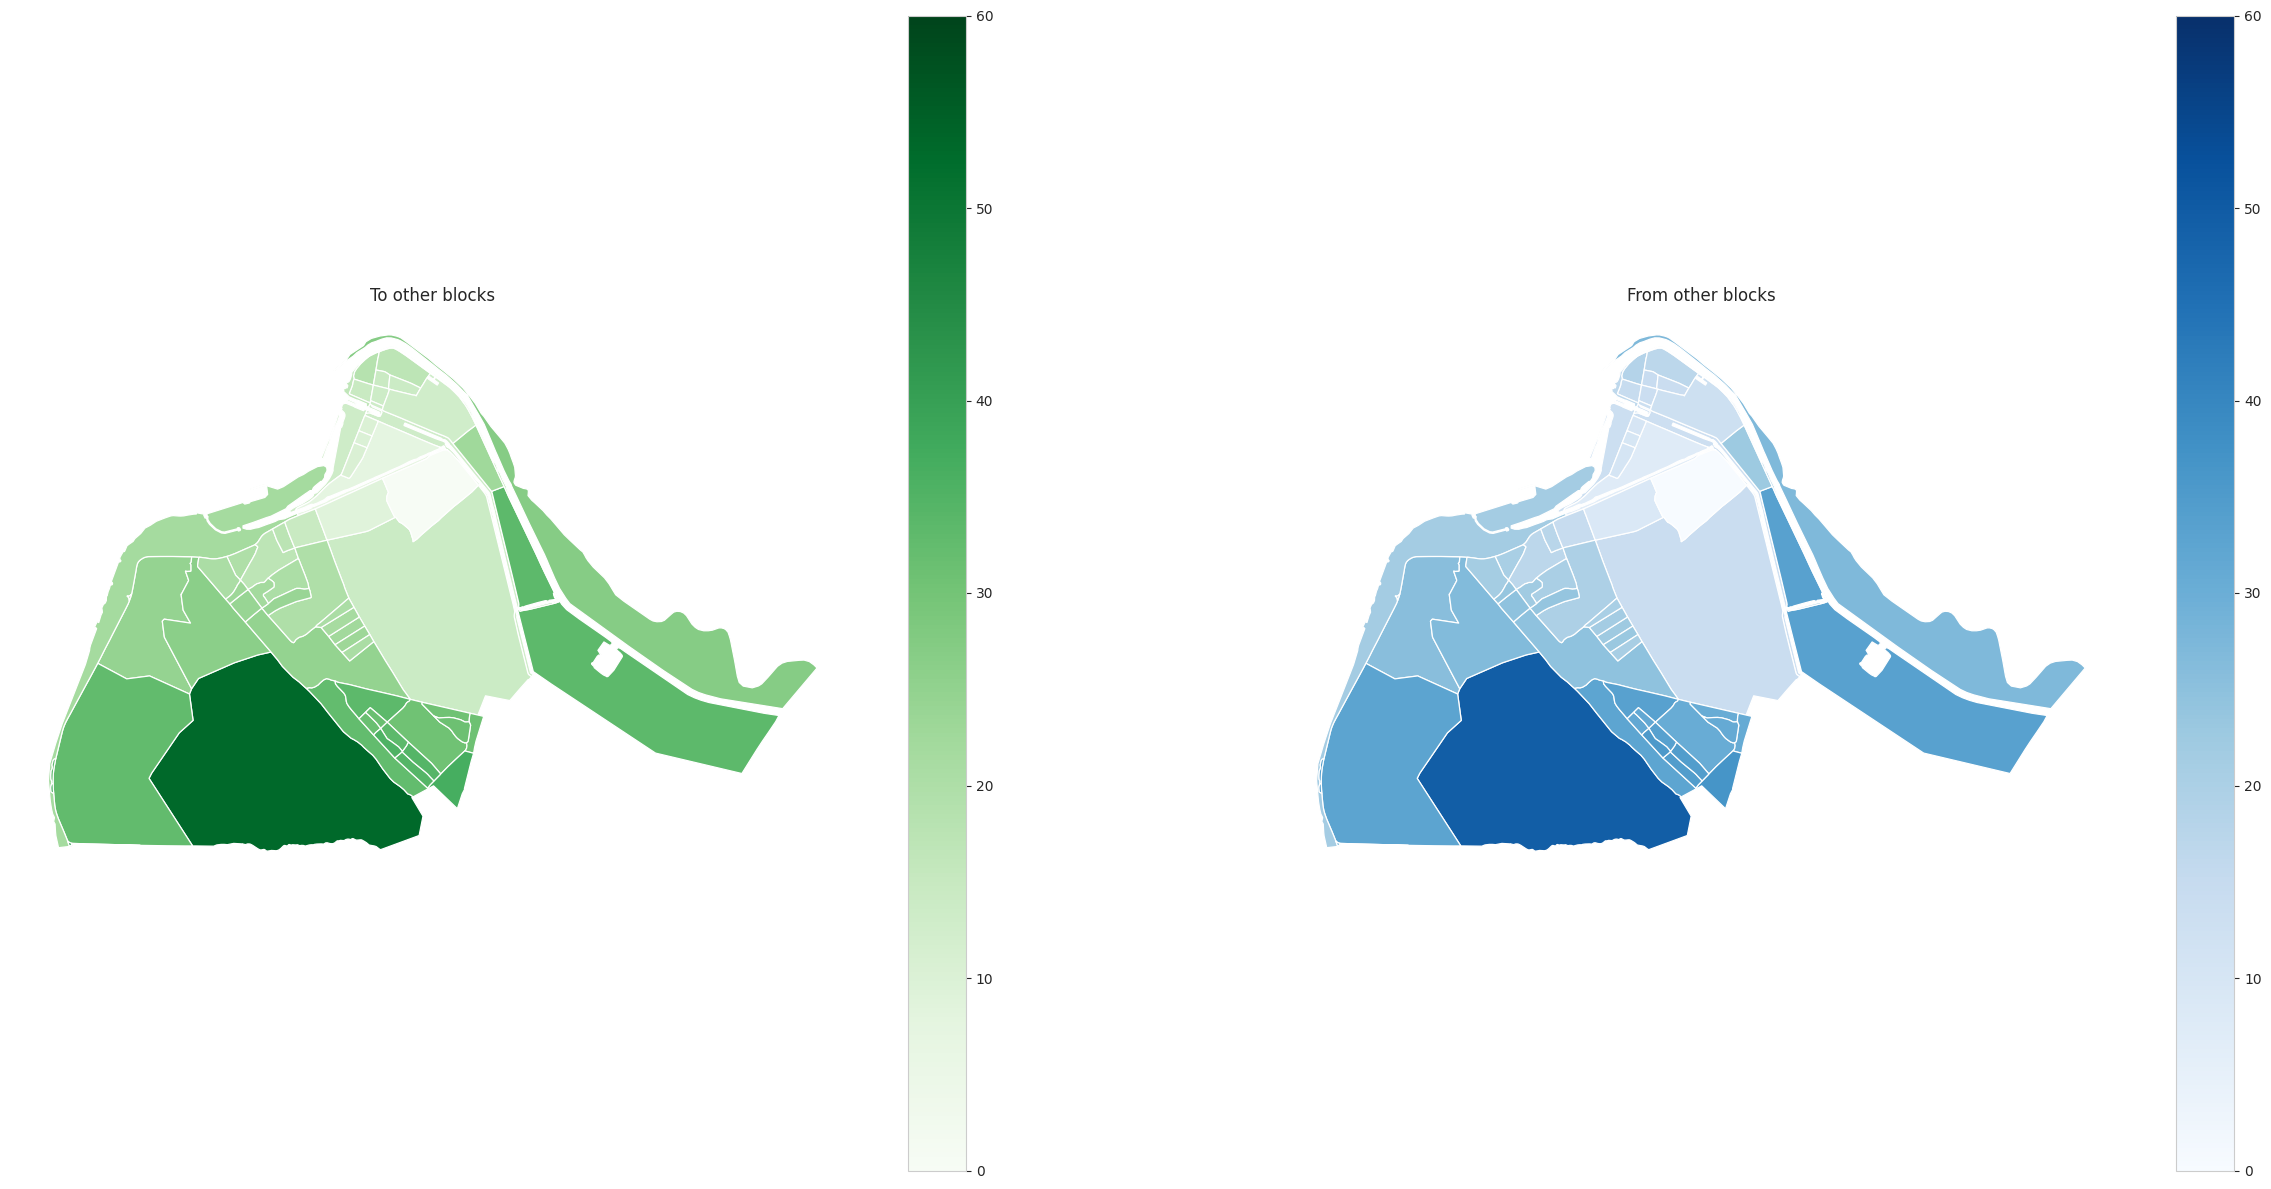

In [ ]:
Accessibility.plot(accessibility_r, linewidth=0.9, figsize=(30,15)) # это для того, чтобы была красивая картинка

In [ ]:
connectivity = Connectivity(city_model=city)
connectivity_r = connectivity.calculate()

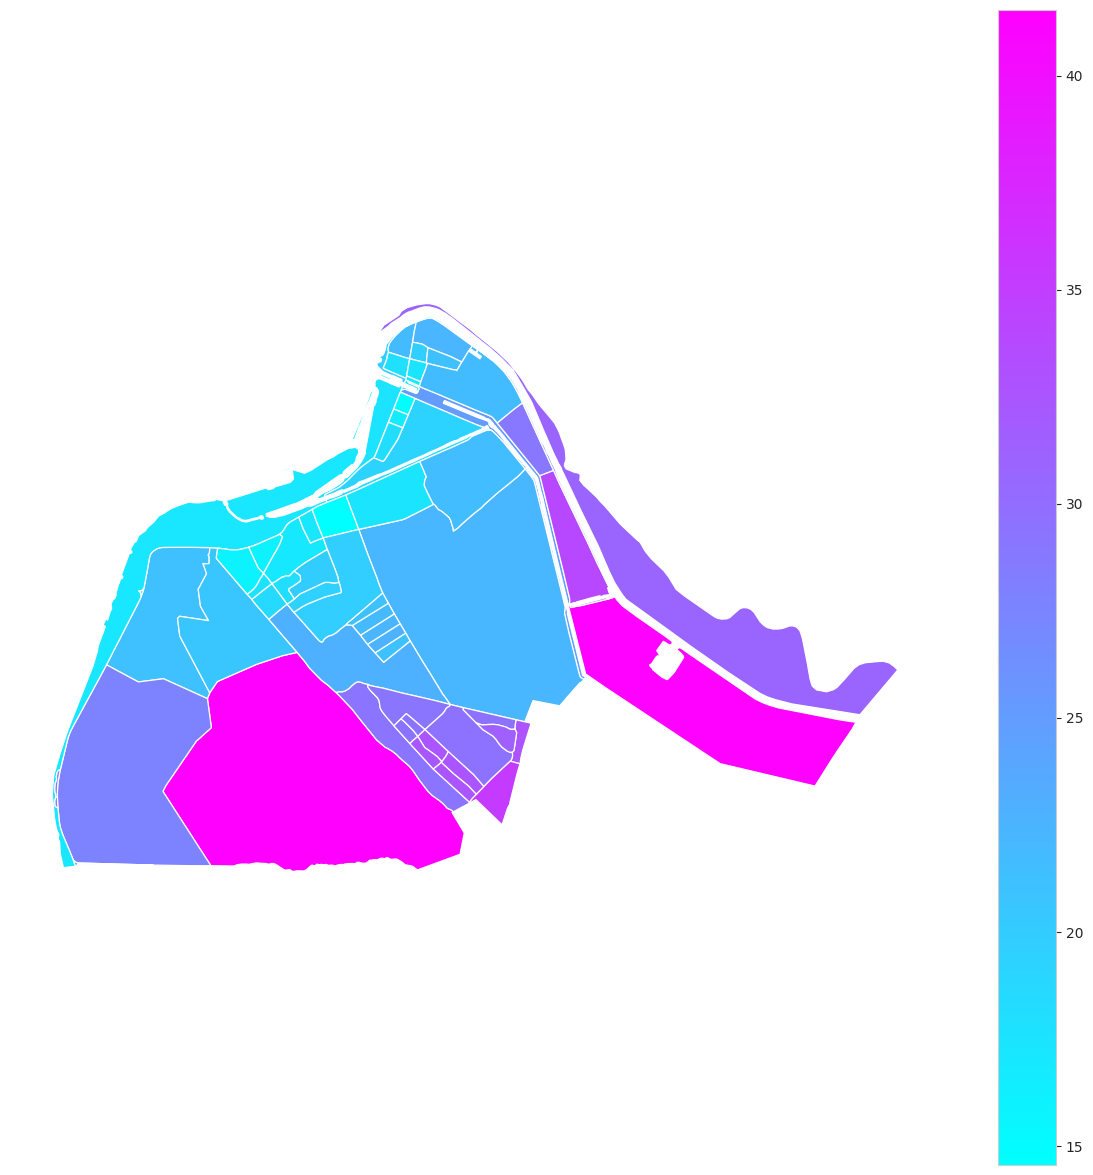

In [ ]:
Connectivity.plot(connectivity_r, linewidth=0.9, figsize=(15,15)) # это для того, чтобы была красивая картинка

In [ ]:
accessibility_matrix =  acc_mx

In [ ]:
District = city

In [ ]:
 District = City(
   blocks=blocks,
   acc_mx=accessibility_matrix,
 )

print(District)

CRS : EPSG:32636
Blocks : 71
Service types : 0/66
Buildings : 0
Services : 0



# Загрузка зданий

Здесь загружаем здания

In [ ]:
buildings = gpd.read_file("building.geojson")

In [ ]:
local_crs = buildings.estimate_utm_crs()
local_crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
buildings = buildings.to_crs(local_crs)
buildings.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
buildings = buildings[buildings.geometry.type.isin(['Polygon', 'MultiPolygon'])]
buildings.head()

,fid,full_id,osm_id,osm_type,building,abandoned,name,building:year_built,building:levels,addr:street,...,r_sewerage_cesspools_volume,r_gas_type,r_ventilation_type,r_firefighting_type,r_drainage_type,r_ya_lat,r_ya_lon,living_area,population,geometry
0,0,w38183581,38183581,way,apartments,None,None,None,5.0,улица 18-го Января,...,NaN,Центральное,Приточно-вытяжная вентиляция,Не заполнено,Внутренние водостоки,59.939361,31.042740,3527.70,64.0,"MULTIPOLYGON (((390619.817 6646300.677, 390632..."
1,1,w38183714,38183714,way,apartments,None,None,None,5.0,улица 18-го Января,...,0.0,Центральное,Приточно-вытяжная вентиляция,Отсутствует,Внутренние водостоки,59.938270,31.040818,7141.72,109.0,"MULTIPOLYGON (((390555.790 6646175.918, 390548..."
2,2,w38183879,38183879,way,apartments,None,None,None,3.0,улица 1 Мая,...,0.0,Центральное,Приточно-вытяжная вентиляция,Отсутствует,Наружные водостоки,59.943354,31.035742,1673.78,35.0,"MULTIPOLYGON (((390260.168 6646703.753, 390264..."
3,3,w38183597,38183597,way,apartments,None,None,None,5.0,улица 1 Мая,...,0.0,Центральное,Приточно-вытяжная вентиляция,Отсутствует,Наружные водостоки,59.943183,31.037386,3486.05,57.0,"MULTIPOLYGON (((390390.945 6646684.964, 390384..."
4,4,w38183995,38183995,way,apartments,None,None,None,5.0,улица 1 Мая,...,0.0,Центральное,Приточно-вытяжная вентиляция,Отсутствует,Наружные водостоки,59.942620,31.038159,3445.11,62.0,"MULTIPOLYGON (((390371.912 6646613.398, 390376..."


In [ ]:
buildings = buildings.reset_index(drop=True)
buildings.head()

,fid,full_id,osm_id,osm_type,building,abandoned,name,building:year_built,building:levels,addr:street,...,r_sewerage_cesspools_volume,r_gas_type,r_ventilation_type,r_firefighting_type,r_drainage_type,r_ya_lat,r_ya_lon,living_area,population,geometry
0,0,w38183581,38183581,way,apartments,None,None,None,5.0,улица 18-го Января,...,NaN,Центральное,Приточно-вытяжная вентиляция,Не заполнено,Внутренние водостоки,59.939361,31.042740,3527.70,64.0,"MULTIPOLYGON (((390619.817 6646300.677, 390632..."
1,1,w38183714,38183714,way,apartments,None,None,None,5.0,улица 18-го Января,...,0.0,Центральное,Приточно-вытяжная вентиляция,Отсутствует,Внутренние водостоки,59.938270,31.040818,7141.72,109.0,"MULTIPOLYGON (((390555.790 6646175.918, 390548..."
2,2,w38183879,38183879,way,apartments,None,None,None,3.0,улица 1 Мая,...,0.0,Центральное,Приточно-вытяжная вентиляция,Отсутствует,Наружные водостоки,59.943354,31.035742,1673.78,35.0,"MULTIPOLYGON (((390260.168 6646703.753, 390264..."
3,3,w38183597,38183597,way,apartments,None,None,None,5.0,улица 1 Мая,...,0.0,Центральное,Приточно-вытяжная вентиляция,Отсутствует,Наружные водостоки,59.943183,31.037386,3486.05,57.0,"MULTIPOLYGON (((390390.945 6646684.964, 390384..."
4,4,w38183995,38183995,way,apartments,None,None,None,5.0,улица 1 Мая,...,0.0,Центральное,Приточно-вытяжная вентиляция,Отсутствует,Наружные водостоки,59.942620,31.038159,3445.11,62.0,"MULTIPOLYGON (((390371.912 6646613.398, 390376..."


In [ ]:
buildings['building:levels'] = pd.to_numeric(buildings['building:levels'], errors='coerce')


buildings['number_of_floors'] = np.ceil(buildings['building:levels'].fillna(1)).astype(int)

buildings['number_of_floors'] = buildings['number_of_floors'].replace(0,1)

buildings['footprint_area'] = buildings.geometry.area

buildings['build_floor_area'] = buildings['footprint_area'] * buildings['number_of_floors']

residential_tags = ['residential', 'house', 'apartments', 'detached', 'terrace', 'dormitory']
buildings['living_area'] = buildings.apply(
    lambda x: 0.8 * x['build_floor_area'] if x['building'] in residential_tags else 0,
    axis=1
)

buildings['non_living_area'] = buildings['build_floor_area'] - buildings['living_area']

buildings['population'] = buildings.apply(
    lambda x: 48 * x['number_of_floors'] if x['building'] in residential_tags else 0,
    axis=1
)

buildings = buildings[['geometry', 'build_floor_area', 'living_area', 'non_living_area',
                       'footprint_area', 'number_of_floors', 'population']]

buildings

,geometry,build_floor_area,living_area,non_living_area,footprint_area,number_of_floors,population
0,"MULTIPOLYGON (((390619.817 6646300.677, 390632...",4779.972584,3823.978067,955.994517,955.994517,5,240
1,"MULTIPOLYGON (((390555.790 6646175.918, 390548...",11023.283179,8818.626543,2204.656636,2204.656636,5,240
2,"MULTIPOLYGON (((390260.168 6646703.753, 390264...",3478.713067,2782.970454,695.742613,1159.571022,3,144
3,"MULTIPOLYGON (((390390.945 6646684.964, 390384...",5931.754785,4745.403828,1186.350957,1186.350957,5,240
4,"MULTIPOLYGON (((390371.912 6646613.398, 390376...",5346.370196,4277.096157,1069.274039,1069.274039,5,240
...,...,...,...,...,...,...,...
3300,"MULTIPOLYGON (((387960.235 6644463.699, 387958...",100.209445,0.000000,100.209445,100.209445,1,0
3301,"MULTIPOLYGON (((387874.807 6643643.061, 387878...",276.135017,0.000000,276.135017,276.135017,1,0
3302,"MULTIPOLYGON (((388443.066 6645255.816, 388418...",600.035229,0.000000,600.035229,600.035229,1,0
3303,"MULTIPOLYGON (((387800.779 6643674.646, 387804...",73.443366,0.000000,73.443366,73.443366,1,0


In [ ]:
District.update_buildings(buildings)

2024-12-23 21:52:40.777 | INFO     | blocksnet.models.city:update_buildings:1237 - Removing existing blocks from the model
2024-12-23 21:52:40.780 | INFO     | blocksnet.models.city:update_buildings:1241 - Joining buildings and blocks
2024-12-23 21:52:41.086 | WARNING  | blocksnet.models.city:update_buildings:1253 - 1775 buildings did not intersect any block
Update blocks buildings: 100%|██████████| 50/50 [00:00<00:00, 170.20it/s]


,geometry,build_floor_area,living_area,non_living_area,footprint_area,number_of_floors,population
406,"MULTIPOLYGON (((391133.857 6644324.148, 391136...",101.847148,0.0,101.847148,101.847148,1,0
407,"MULTIPOLYGON (((391157.359 6644324.977, 391159...",92.320555,0.0,92.320555,92.320555,1,0
408,"MULTIPOLYGON (((391176.818 6644319.759, 391179...",101.847210,0.0,101.847210,101.847210,1,0
409,"MULTIPOLYGON (((391199.184 6644314.126, 391201...",92.320773,0.0,92.320773,92.320773,1,0
410,"MULTIPOLYGON (((391092.688 6644333.582, 391094...",101.846945,0.0,101.846945,101.846945,1,0
...,...,...,...,...,...,...,...
2980,"MULTIPOLYGON (((390388.964 6647911.747, 390390...",8.786906,0.0,8.786906,8.786906,1,0
2981,"MULTIPOLYGON (((390380.126 6647866.812, 390378...",39.303464,0.0,39.303464,39.303464,1,0
2982,"MULTIPOLYGON (((390443.322 6647813.556, 390443...",98.187670,0.0,98.187670,98.187670,1,0
2983,"MULTIPOLYGON (((390536.148 6647834.106, 390540...",102.921223,0.0,102.921223,102.921223,1,0


In [ ]:
District.get_buildings_gdf()

,block_id,geometry,population,footprint_area,build_floor_area,living_area,non_living_area,number_of_floors,is_living
id,,,,,,,,,
2741,0,"POLYGON ((390004.240 6643634.324, 390018.064 6...",0,79.813030,79.813030,0.0,79.813030,1,False
2743,0,"POLYGON ((389906.073 6643637.589, 389904.753 6...",0,98.414790,98.414790,0.0,98.414790,1,False
2761,0,"POLYGON ((388801.201 6643718.704, 388819.047 6...",0,159.634917,159.634917,0.0,159.634917,1,False
2823,0,"POLYGON ((389257.312 6644662.750, 389262.382 6...",0,204.139648,204.139648,0.0,204.139648,1,False
2742,0,"POLYGON ((390013.722 6643678.314, 390033.377 6...",0,331.472348,331.472348,0.0,331.472348,1,False
...,...,...,...,...,...,...,...,...,...
2545,65,"POLYGON ((390164.173 6644963.836, 390154.427 6...",0,193.762935,387.525870,0.0,387.525870,2,False
2546,65,"POLYGON ((390147.770 6644951.908, 390137.530 6...",0,215.064687,430.129374,0.0,430.129374,2,False
2542,65,"POLYGON ((390131.862 6644992.352, 390121.191 6...",0,220.419275,440.838549,0.0,440.838549,2,False


In [ ]:
def remove_inner_polygons(gdf_polygons):
    to_remove = []
    for idx, poly1 in gdf_polygons.iterrows():
        for idx2, poly2 in gdf_polygons.iterrows():
            if idx != idx2 and poly1.geometry.contains(poly2.geometry):
                to_remove.append(idx2)
    return gdf_polygons.drop(to_remove)

def remove_close_centroids(gdf_centroids, buffer_distance=60):
    final_centroids = gpd.GeoDataFrame(columns=gdf_centroids.columns, crs=gdf_centroids.crs)

    while not gdf_centroids.empty:
        current_point = gdf_centroids.iloc[0]

        buffer = current_point.geometry.buffer(buffer_distance)

        close_points = gdf_centroids[gdf_centroids.geometry.within(buffer)]

        final_centroids = gpd.GeoDataFrame(
            pd.concat([final_centroids, gpd.GeoDataFrame([current_point])], ignore_index=True)
        )

        gdf_centroids = gdf_centroids.drop(close_points.index)

    return final_centroids


In [ ]:
for filename in os.listdir(data_path):
    if filename.endswith('.geojson'):
        variable_name = os.path.splitext(filename)[0]
        if variable_name in ['building', 'blocks']:
          continue
        file_path = os.path.join(data_path, filename)
        gdf = gpd.read_file(file_path)
        gdf = gdf.reset_index(drop=True)
        gdf = gdf.to_crs(local_crs)
        gdf = remove_inner_polygons(gdf)
        gdf['geometry'] = gdf.centroid
        gdf = remove_close_centroids(gdf)
        geometry = gdf[['geometry']]

        if geometry.empty or geometry.is_empty.any():
            print(f"Геоданные для {variable_name} пустые или невалидные. Пропускаем.")
            continue

        try:
            District.update_services(variable_name, geometry)
            print(f"Загрузили сервис: {variable_name}")
        except Exception as e:
            try:
              District.add_service_type(ServiceType(code='', name = variable_name, accessibility=15, demand=100, bricks=[{"capacity": 20, "area": 600.0, "is_integrated": False, "parking_area": 0}]))
              District.update_services(variable_name, geometry)
              print(f"Создаем сервис и загружаем: {variable_name}")
            except Exception as e:
              print(f"Пропускаем: {variable_name}")



Создаем сервис и загружаем: electronic
Загрузили сервис: bar
Загрузили сервис: mall
Создаем сервис и загружаем: veterinary
Создаем сервис и загружаем: funeral_directors
Загрузили сервис: bakery
Создаем сервис и загружаем: attraction
Создаем сервис и загружаем: mfz
Загрузили сервис: convenience
Создаем сервис и загружаем: copyshop
Загрузили сервис: parking
Создаем сервис и загружаем: shoemaker
Создаем сервис и загружаем: library
Загрузили сервис: hotel
Создаем сервис и загружаем: forest
Создаем сервис и загружаем: trauma
Создаем сервис и загружаем: dentist
Загрузили сервис: stadium
Создаем сервис и загружаем: insurance
Создаем сервис и загружаем: clothes
Загрузили сервис: cafe
Создаем сервис и загружаем: fire_station
Создаем сервис и загружаем: atm
Создаем сервис и загружаем: child_polyclinic
Создаем сервис и загружаем: ministry
Создаем сервис и загружаем: clinic
Загрузили сервис: fuel
Загрузили сервис: pharmacy
Загрузили сервис: museum
Создаем сервис и загружаем: driving_school
Загрузи

In [ ]:
services_gdf = District.get_services_gdf()
services_gdf.head()

,geometry,block_id,service_type,capacity,area,is_integrated,building_id
0,POINT (389648.045 6643850.256),0,forest,20,600.0,False,NaN
1,POINT (389367.292 6643266.257),0,forest,20,600.0,False,NaN
2,POINT (388433.038 6643805.000),0,forest,20,600.0,False,NaN
3,POINT (388515.771 6643678.250),0,forest,20,600.0,False,NaN
4,POINT (388557.900 6643805.462),0,forest,20,600.0,False,NaN


In [ ]:
lup = LandUsePrediction(city_model=District)
lu_blocks = lup.calculate()
lu_blocks.head()

100%|██████████| 71/71 [00:00<00:00, 177.52it/s]


,geometry,land_use
id,,
0,"POLYGON ((390244.643 6643271.330, 390231.440 6...",None
1,"POLYGON ((387981.845 6644905.097, 387987.642 6...",RESIDENTIAL
2,"POLYGON ((387704.493 6643326.830, 387693.262 6...",AGRICULTURE
3,"POLYGON ((388673.026 6645477.173, 388646.448 6...",INDUSTRIAL
4,"POLYGON ((391482.755 6644688.575, 391477.541 6...",RECREATION


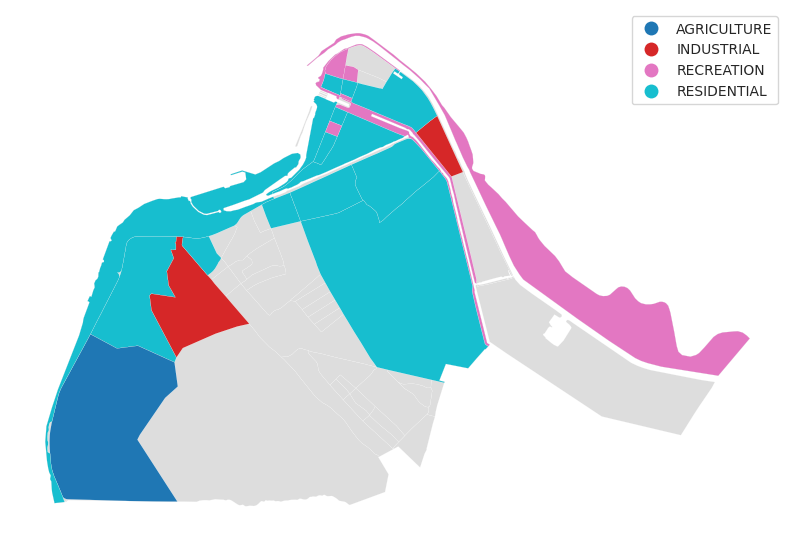

In [ ]:
lup.plot(lu_blocks)

In [ ]:
District.update_land_use(lu_blocks)

# Оценка (4 нб)

Метод оценки разнообразися сервисов в кварталах, основанный на индексе Шеннона

In [ ]:
class ExtendedProvision(Provision):
    def calculate_all(self):
        all_services = list(self.city_model._service_types.keys())
        results = {}
        for service_type in all_services:
            try:
                results[service_type] = self.calculate(service_type=service_type)
            except Exception as e:
                print(f"Error calculating for {service_type}: {e}")
        return gpd.GeoDataFrame(pd.concat(results.values(), keys=results.keys()))

# Используем новый класс
prov = ExtendedProvision(city_model=District)
prov_res = prov.calculate_all()

2024-12-23 22:34:11.445 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 15 : 14x2
2024-12-23 22:34:11.453 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 22:34:11.469 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 22:34:11.480 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished
2024-12-23 22:34:11.578 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 7 : 14x3
2024-12-23 22:34:11.585 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 22:34:11.598 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 22:34:11.609 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished
2024-12-23 22:34:11.704 | INFO     | blocksnet.method.provision:_lp_p

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


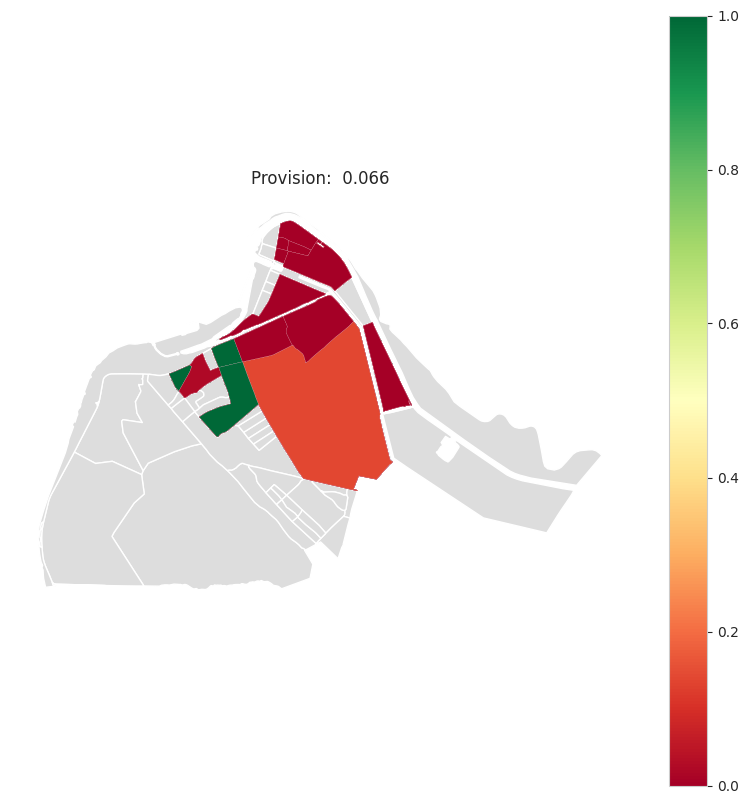

In [ ]:
prov.plot(prov_res)

In [ ]:
diversity = Diversity(city_model=District)
result_devirsity = diversity.calculate()

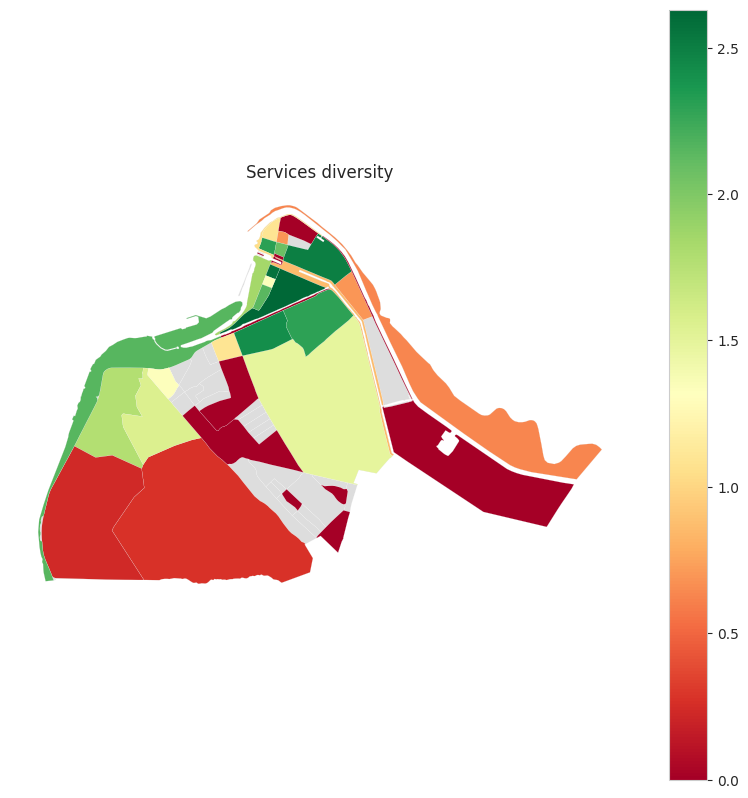

In [ ]:
Diversity.plot(result_devirsity, figsize =(10,10))

Методы вычисления центральности кварталов города:

In [ ]:
centrality = Centrality(city_model=District)
result_centrality = centrality.calculate()

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map

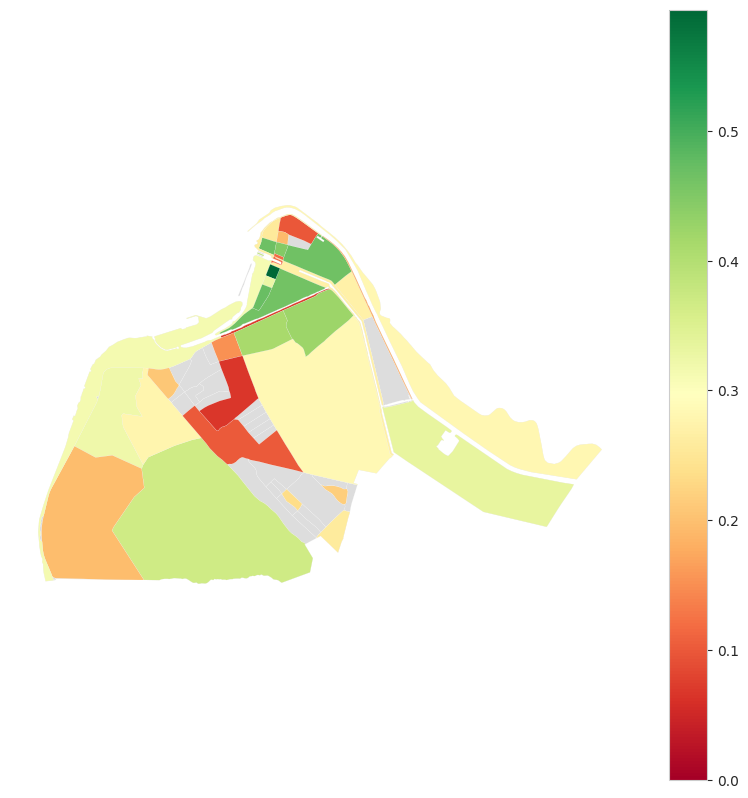

In [ ]:
Centrality.plot(result_centrality, figsize =(10,10))

In [ ]:
centrality_population = PopulationCentrality(city_model=District)

In [ ]:
result_centrlity_population = centrality_population.calculate()

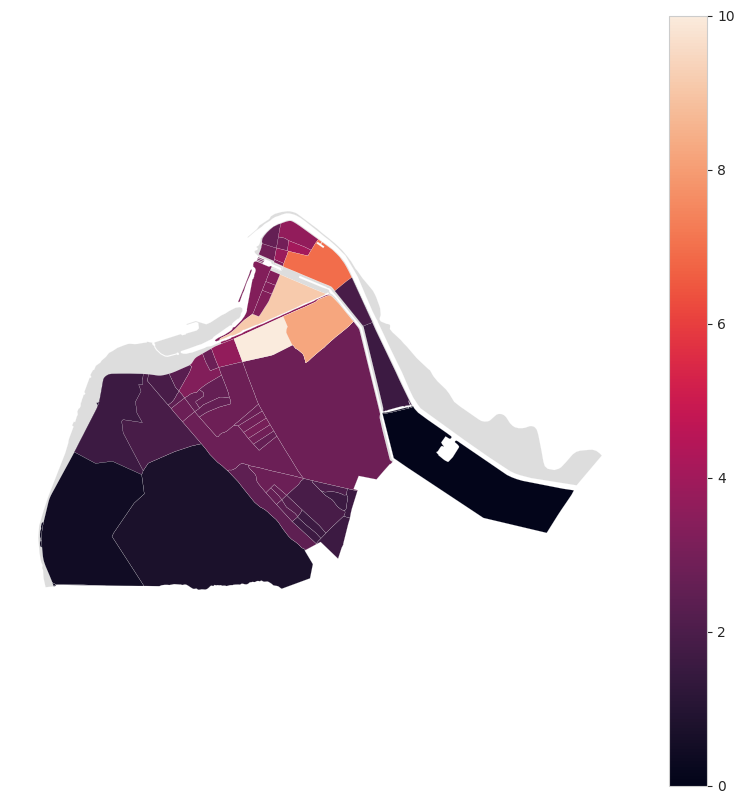

In [ ]:
PopulationCentrality.plot(result_centrlity_population, figsize =(10,10))

Метрика оценки кварталов SpaceMatrix

In [ ]:
spacematrix = Spacematrix(city_model=District)
result_spacematrix = spacematrix.calculate()

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x78a8f50e0b80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so: cannot open shared object file: No such file or directory


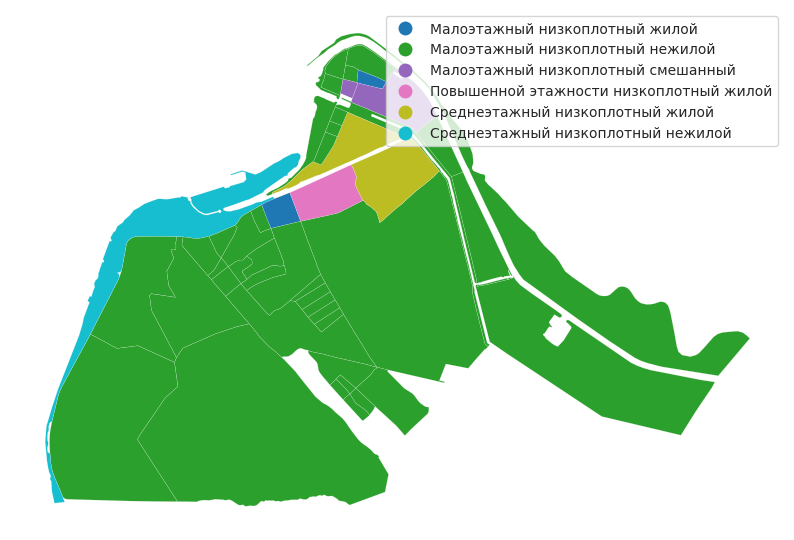

In [ ]:
Spacematrix.plot(result_spacematrix, figsize =(10,10))

Метод определения типа землепользования квартала (LandUse) на основе сущетсвующих в модели городских сервисов.

In [ ]:
lup = LandUsePrediction(city_model=District)

In [ ]:
result_lup = lup.calculate()

100%|██████████| 71/71 [00:00<00:00, 171.00it/s]


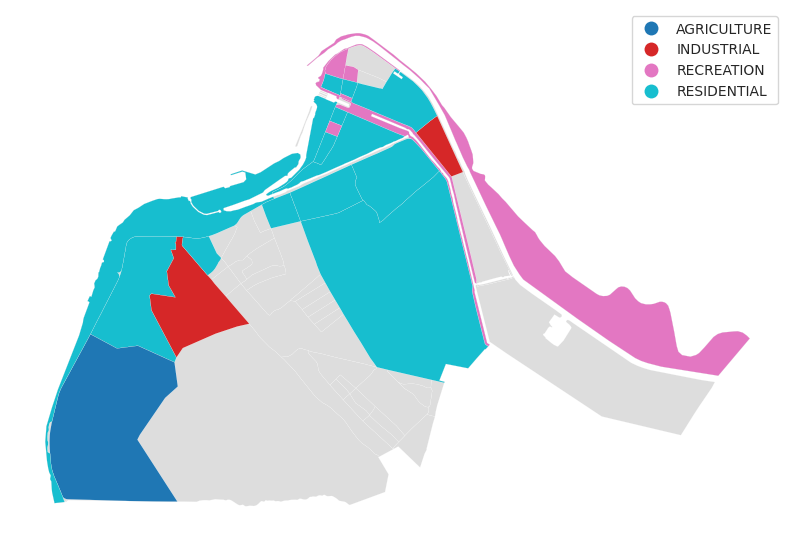

In [ ]:
LandUsePrediction.plot(result_lup)

Метод определения [свободной площади]

In [ ]:
va = VacantArea(city_model=District)

In [ ]:
gdf_blocks = District.get_blocks_gdf(simplify=True)

In [ ]:
gdf_blocks.explore()

In [ ]:
block = District[34]
result_va = va.calculate([block])

Error encountered: No data elements in server response. Check log and query location/tags.
Error encountered: No data elements in server response. Check log and query location/tags.


/usr/local/lib/python3.10/dist-packages/pyproj/transformer.py:817: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._transformer._transform_point(
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:2475: UserWarning: `keep_geom_type=True` in overlay resulted in 10 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


In [ ]:
result_va.explore()